In [1]:
import pathlib
import contextlib
import tempfile
from cogent3 import get_app
from cogent3 import get_app, open_data_store
from clock_project.data_processing.data_filter_seqs import drop_invalid_length, trim_stop

@contextlib.contextmanager
def tempdir(working_dir: pathlib.Path | str | None = None) -> pathlib.Path:
    """context manager returns a temporary directory in working_dir"""
    with tempfile.TemporaryDirectory(dir=working_dir) as temp_dir:
        yield pathlib.Path(temp_dir)

import subprocess
import sys

def exec_command(
    cmnd: str,
    stdout: int = subprocess.PIPE,
    stderr: int = subprocess.PIPE,
) -> str | None:
    """Executes shell command and returns stdout if completed with exit code 0."""
    proc = subprocess.Popen(cmnd, shell=True, stdout=stdout, stderr=stderr)
    out, err = proc.communicate()
    if proc.returncode != 0:
        msg = err
        sys.stderr.writelines(f"FAILED: {cmnd}\n{msg}")
        sys.exit(proc.returncode)
    return out.decode("utf8") if out is not None else None


In [2]:
#apps to load the cogents3 seq collections from fasta file and tranalate to aa
loader = get_app("load_unaligned", format="fasta")
translater = get_app("translate_seqs")
process = loader + translater

# def align_via_aa(seqs: typing.SeqsCollectionType, gc=1) -> typing.AlignedSeqsType:
#     """Translates a nucleotide align amino acid sequences back to DNA"""
#     translater = get_app("translate_seqs", gc=gc)
#     prot_aln = get_app("progressive_align", "protein", unique_guides=True)
#     app = translater + prot_aln
#     aligned_aa = app(seqs).to_type(array_align=True)
#     return aligned_aa.replace_seqs(seqs)

# in_dstore = open_data_store("/Users/gavin/repos/Cogent3/working/symposia-talk/sampled_homologies_3000_renamed", suffix="fa", mode="r")

# loader = get_app("load_unaligned", moltype="dna")

# m = in_dstore.completed[0]
# trim_stop = get_app("trim_stop_codons", gc=1)
# aligner = align_via_aa()
# app = loader + trim_stop + aligner
# g = app(m)


In [3]:
seq_dir = "/Users/gulugulu/Desktop/honours/data_local_2/sampled_homologies"
output_dir = '/Users/gulugulu/Desktop/honours/data_local/mammal_genome_codon_aln'
input_dstore_seqs = open_data_store(seq_dir, suffix="fa", mode="r")
loader = get_app("load_unaligned", format="fasta", moltype="dna")
seq_filtered_dir = "/Users/gulugulu/Desktop/honours/data_local_2/sampled_homologies_filtered"
seqs = loader(input_dstore_seqs[51])
seq1 = drop_invalid_length(seqs)
valid_seq = trim_stop(seq1)
a = aligner(valid_seq)
a.dotplot()

NameError: name 'aligner' is not defined

In [4]:
from cogent3 import get_app, open_data_store

seq_dir = "/Users/gulugulu/Desktop/honours/data_local_2/sampled_homologies"
input_dstore_seqs = open_data_store(seq_dir, suffix="fa", mode="r")
input_dstore_seqs[0]

fasta_dir = pathlib.Path(seq_dir)  # Replace with your directory path

# Get all .fasta files in the directory
fasta_files = list(fasta_dir.glob("*.fa"))


In [5]:

def get_mafft_aligned_seq(seqs_dir: str) -> str:
    """
    Loads sequences from the input directory, translates them to amino acids,
    aligns using MAFFT, and returns the aligned DNA sequence collection.

    Parameters
    ----------
    seqs_dir: str

    Returns
    -------
    str
        Path to the aligned amino acid FASTA file.
    """
    # Temporary directory context
    with tempdir() as temp_dir:
        aa_fasta_path = temp_dir / "aa_sequences.fasta"
        aligned_aa_path = temp_dir / "aligned_aa.fasta"

        # Load and translate the first FASTA file
        seqs = loader(seqs_dir)
        aa_seqs = translater(seqs_dir)

        # Write translated amino acid sequences to temporary FASTA file
        aa_seqs.write(aa_fasta_path, format="fasta")

        # Build the MAFFT command
        mafft_command = f"mafft --amino {aa_fasta_path} > {aligned_aa_path}"
        print(f"Running MAFFT: {mafft_command}")

        # Execute the MAFFT command
        exec_command(mafft_command)

        # Load the aligned amino acid sequences
        loader_aligned = get_app("load_aligned", format="fasta")
        aligned_seq_collection = loader_aligned(str(aligned_aa_path)).to_type(array_align=True)        

        aligned_seqs = aligned_seq_collection.replace_seqs(seqs)
        

    return aligned_seqs

In [6]:
path = '/Users/gulugulu/Desktop/honours/data_local_2/sampled_homologies/valid_seqs.fa'
seqs = loader(path)
aa = translater(seqs)

In [7]:
mafft_seqs_aligned = get_mafft_aligned_seq(path)
# mafft_seqs_aligned.dotplot(name1 = 'cebus_imitator-ENSCCAG00000029039', name2 = 'camelus_dromedarius-ENSCDRG00005017479')

AttributeError: 'NotCompleted' object has no attribute 'write'

In [9]:
mafft_seqs_aligned.write('/Users/gulugulu/Desktop/honours/data_local_2/sampled_homologies/problem.fa')

In [11]:
mafft_seqs_aligned.dotplot(name1 = 'cebus_imitator-ENSCCAG00000029039', name2 = 'camelus_dromedarius-ENSCDRG00005017479')

In [12]:
pair.dotplot()

In [ ]:
from clock_project.data_processing.data_filter_seqs import aligner
cogent3_aligner_seqs = aligner(seqs)

In [14]:
cogent3_aligner_seqs.dotplot(name1 = 'microtus_ochrogaster-ENSMOCG00000017820', name2 = 'saimiri_boliviensis_boliviensis-ENSSBOG00000031882')

In [15]:
mafft_seqs_aligned.dotplot(name1 = 'microtus_ochrogaster-ENSMOCG00000017820', name2 = 'saimiri_boliviensis_boliviensis-ENSSBOG00000031882')

In [16]:
cogent3_aligner_seqs.take_seqs(['microtus_ochrogaster-ENSMOCG00000017820','saimiri_boliviensis_boliviensis-ENSSBOG00000031882'])[1322:1421]

,0
microtus_ochrogaster-ENSMOCG00000017820,GAACACTCAGGCCGAGGTGTCTCGACGGATCTTGAAGTGCTCCCCTCCCTTCCCCCTCCG
saimiri_boliviensis_boliviensis-ENSSBOG00000031882,......A.....T..................C........................CT..


In [17]:
mafft_seqs_aligned.take_seqs(['microtus_ochrogaster-ENSMOCG00000017820','saimiri_boliviensis_boliviensis-ENSSBOG00000031882'])[1322:1421]

,0
microtus_ochrogaster-ENSMOCG00000017820,TCCCTTCCCCCTCCGGATCGGGCCTGTGGCACAGGACCTGCTACAGAGGCTGCTGTGTAA
saimiri_boliviensis_boliviensis-ENSSBOG00000031882,...........CT.................G...........G...C....A..T..C..


In [18]:
cogent3_aligner_seqs.dotplot(name1 = 'cebus_imitator-ENSCCAG00000029039', name2 = 'camelus_dromedarius-ENSCDRG00005017479')

In [19]:
cogent3_aligner_seqs.dotplot(name1 = 'moschus_moschiferus-ENSMMSG00000022543', name2 = 'saimiri_boliviensis_boliviensis-ENSSBOG00000031882')


In [20]:
mafft_seqs_aligned.dotplot(name1 = 'moschus_moschiferus-ENSMMSG00000022543', name2 = 'saimiri_boliviensis_boliviensis-ENSSBOG00000031882')


In [21]:
cogent3_aligner_seqs.dotplot(name1 = 'moschus_moschiferus-ENSMMSG00000022543', name2 = 'dipodomys_ordii-ENSDORG00000007519')


In [22]:
mafft_seqs_aligned.dotplot(name1 = 'moschus_moschiferus-ENSMMSG00000022543', name2 = 'dipodomys_ordii-ENSDORG00000007519')

In [ ]:

from cogent3 import get_app, open_data_store
from cogent3.app.composable import define_app
from cogent3 import get_app
from cogent3.app import typing
import pathlib
import contextlib
import tempfile
import subprocess
import sys
import click
import multiprocessing

@contextlib.contextmanager
def tempdir(working_dir: pathlib.Path | str | None = None) -> pathlib.Path:
    """context manager returns a temporary directory in working_dir"""
    with tempfile.TemporaryDirectory(dir=working_dir) as temp_dir:
        yield pathlib.Path(temp_dir)

def exec_command(
    cmnd: str,
    stdout: int = subprocess.PIPE,
    stderr: int = subprocess.PIPE,
) -> str | None:
    """Executes shell command and returns stdout if completed with exit code 0."""
    proc = subprocess.Popen(cmnd, shell=True, stdout=stdout, stderr=stderr)
    out, err = proc.communicate()
    if proc.returncode != 0:
        msg = err
        sys.stderr.writelines(f"FAILED: {cmnd}\n{msg}")
        sys.exit(proc.returncode)
    return out.decode("utf8") if out is not None else None

@define_app
def get_mafft_aligned_seq(seqs: typing.SeqsCollectionType, gc=1) -> typing.AlignedSeqsType:
    """
    Loads sequences from the input directory, translates them to amino acids,
    aligns using MAFFT, and returns the aligned DNA sequence collection.

    Parameters
    ----------
    seqs_dir: str

    Returns
    -------
    str
        Path to the aligned amino acid FASTA file.
    """
    # Temporary directory context
    with tempdir() as temp_dir:
        aa_fasta_path = temp_dir / "aa_sequences.fasta"
        aligned_aa_path = temp_dir / "aligned_aa.fasta"
        translater = get_app("translate_seqs", gc=gc)

        # Load and translate the first FASTA file
        aa_seqs = translater(seqs)

        # Write translated amino acid sequences to temporary FASTA file
        aa_seqs.write(aa_fasta_path, format="fasta")

        # Build the MAFFT command
        mafft_command = f"mafft --amino {aa_fasta_path} > {aligned_aa_path}"
        print(f"Running MAFFT: {mafft_command}")

        # Execute the MAFFT command
        exec_command(mafft_command)

        # Load the aligned amino acid sequences
        loader_aligned = get_app("load_aligned", format="fasta")
        aligned_seq_collection = loader_aligned(str(aligned_aa_path)).to_type(array_align=True)        

        aligned_seqs = aligned_seq_collection.replace_seqs(seqs)
        print('successfully aligned')

    return aligned_seqs
        

def process_path(in_path, out_dstore):
    """
    Processes the given path by loading, aligning, and writing sequences.
    """
    loader = get_app("load_unaligned", format="fasta", moltype="dna")
    mafft_aligner = get_mafft_aligned_seq()   
    writer = get_app("write_seqs", out_dstore, format="fasta")

    file_name = in_path.unique_id
    print(f"Processing file: {file_name}")
    
    # Apply the composed apps (loader + mafft_aligner + writer)
    processer = loader + mafft_aligner + writer
    processer(in_path)

In [17]:
input = '/Users/gulugulu/clock/mammal_orthologs_hsap_1/sampled_unaligned'
output_dir = '/Users/gulugulu/clock/mammal_orthologs_hsap_1/raw_aligned_2'
input_data_store = open_data_store(input, suffix='fa', limit=10)
out_dstore = open_data_store(output_dir, mode="w", suffix="fa")
loader = get_app("load_unaligned", format="fasta", moltype="dna")
mafft_aligner = get_mafft_aligned_seq()   
writer = get_app("write_seqs", out_dstore, format="fasta")

In [5]:
input_data_store[0]

DataMember(data_store=/Users/gulugulu/clock/mammal_orthologs_hsap_1/sampled_unaligned, unique_id=ENSG00000157184.fa)

In [ ]:
process_path(input, output_dir)

In [18]:
seqs = loader(input_data_store[2])

writer(mafft_aligner(seqs), identifier = 'a.fa')

Running MAFFT: mafft --amino /var/folders/d8/pdrt51hx2jb17vf6k28_x6mh0000gn/T/tmpmixgx4fr/aa_sequences.fasta > /var/folders/d8/pdrt51hx2jb17vf6k28_x6mh0000gn/T/tmpmixgx4fr/aligned_aa.fasta
successfully aligned


DataMember(data_store=/Users/gulugulu/clock/mammal_orthologs_hsap_1/raw_aligned_2, unique_id=a.fa)

In [ ]:
seqs.

/var/folders/d8/pdrt51hx2jb17vf6k28_x6mh0000gn/T/ipykernel_52984/926656060.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


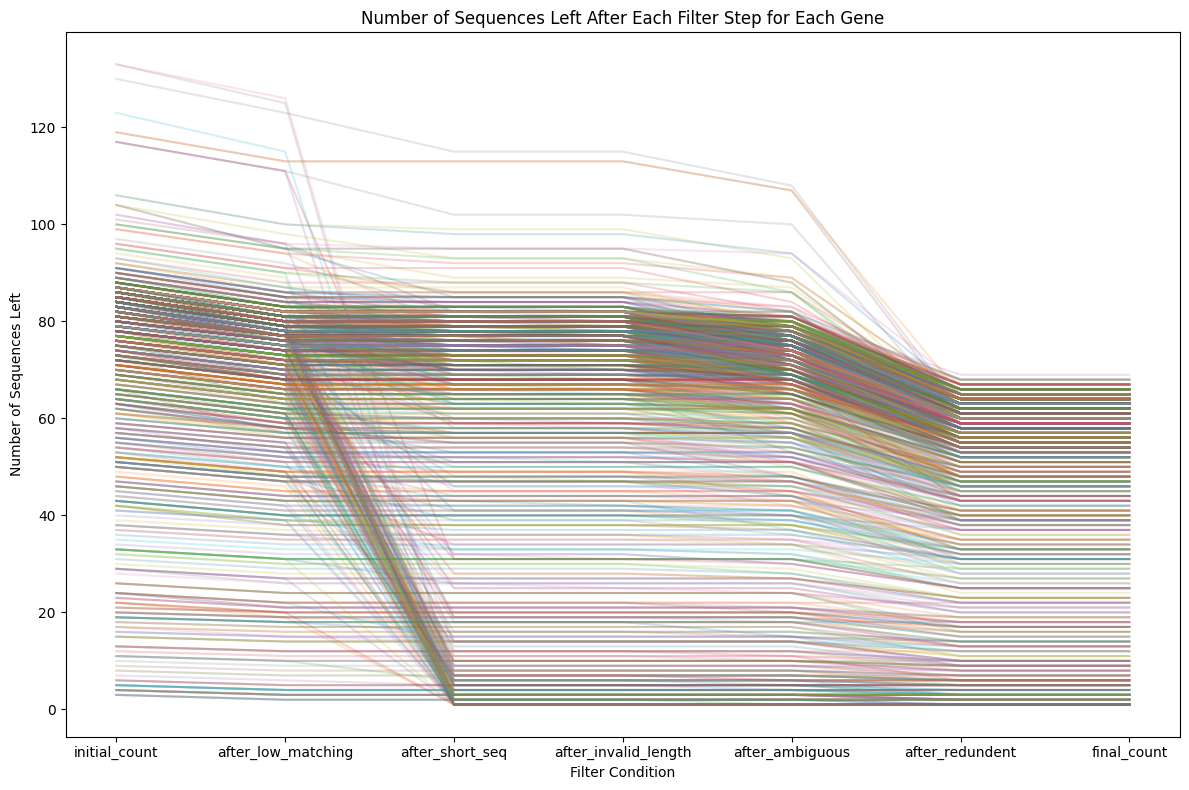

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file (replace this with your actual file path)
csv_path = "/Users/gulugulu/clock/mammal_orthologs_hsap_1/sampled_unaligned_2/summary.csv"  # Update with the actual path where your CSV is saved
df = pd.read_csv(csv_path)

# Filter conditions for x-axis
filter_conditions = ['initial_count', 'after_low_matching', 'after_short_seq', 
                     'after_invalid_length', 'after_ambiguous', 'after_redundent', 'final_count']

# Set up the figure
plt.figure(figsize=(12, 8))

# Plot each gene as a line with transparency
for i, row in df.iterrows():
    plt.plot(filter_conditions, row[filter_conditions], label=row['gene'], alpha=0.2)

# Add labels and title
plt.xlabel('Filter Condition')
plt.ylabel('Number of Sequences Left')
plt.title('Number of Sequences Left After Each Filter Step for Each Gene')

# plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
path = '/Users/gulugulu/clock/mammal_orthologs_hsap_1/raw_seqs'
a = open_data_store(path, suffix='fa')


completed,1839
not_completed,0
logs,0


In [6]:
from cogent3 import get_app, open_data_store
import click

from clock_project.data_processing.data_filter_seqs import cpos3
import json

from cogent3 import get_app
from cogent3.app.typing import SeqsCollectionType
import multiprocessing
from cogent3.app.composable import define_app
from cogent3.app.composable import NotCompleted


@define_app
def replace_common_species_names(alignment: SeqsCollectionType	
) -> SeqsCollectionType:
    with open ('/Users/gulugulu/repos/PuningAnalysis/results/output_data/genome_information/available_species_name.json', 'r') as infile1:
        available_species_names = json.load(infile1)

    with open ('/Users/gulugulu/repos/PuningAnalysis/results/output_data/genome_information/common_names.json', 'r') as infile2:
        common_names = json.load(infile2)
    name_map = dict(zip(available_species_names, common_names))
    
    new_names = {}
    
    # Iterate through the sequence names in the alignment
    for name in alignment.names:
        species_info, gene_info = name.split('-', 1)
        
        # Check if the species part exists in the name mapping
        if species_info in name_map:
            # Create a new name using the common name and the gene info
            new_name = name_map[species_info]
            new_names[name] = new_name
        else:
            # If no mapping exists, keep the original name
            print(species_info)
            new_names[name] = species_info
    
    # Update the sequence names in the alignment with new names
    return alignment.rename_seqs(lambda x: new_names[x])

common_name_renamer = replace_common_species_names()



@define_app
def filter_by_num_seqs(data: SeqsCollectionType, min_num_seqs: int) -> SeqsCollectionType:
    """
    Filters sequence collections based on the minimum number of sequences.

    """
    num_seqs = data.num_seqs

    if num_seqs < min_num_seqs:
        msg = f"{num_seqs} < min_num_seqs {min_num_seqs}"
        return NotCompleted("FALSE", None, msg, source=data)

    return data

min_sample_size = filter_by_num_seqs(min_num_seqs = 30)
third_pos = get_app("take_codon_positions", 3)
just_nucs =get_app("omit_degenerates", moltype="dna")
min_length = get_app("min_length", 550)

input = '/Users/gulugulu/clock/mammal_orthologs_hsap_1/raw_aligned'
output_dir = '/Users/gulugulu/clock/mammal_orthologs_hsap_1/sampled_aligned'

input_data_store = open_data_store(input, suffix='fa', limit=100)
out_dstore = open_data_store(output_dir, mode="w", suffix="fa")
loader = get_app("load_aligned", format="fasta", moltype="dna")
writer = get_app("write_seqs", out_dstore, format="fasta")

def process_path(path, aln_processer):
    aln_processer(path)




            


In [1]:
from ensembl_tui._species import Species
from cogent3 import load_tree
import click
import multiprocessing
import json
from cogent3 import get_app, open_data_store
from cogent3.app.composable import define_app
from cogent3.app.typing import SeqsCollectionType, SerialisableType

with open ('/Users/gulugulu/repos/PuningAnalysis/results/output_data/genome_information/available_species_name.json', 'r') as infile:
    available_species_names = json.load(infile)

with open ('/Users/gulugulu/repos/PuningAnalysis/results/output_data/genome_information/common_names_mapping.json',  'r') as common_name_infile:
    common_names_mapping = json.load(common_name_infile)

tree_path = '/Users/gulugulu/repos/PuningAnalysis/data/dataset2_ensemble_trees/raw_data/tree_nh_file/vertebrates_species-tree_Ensembl.nh'

def decorate_vertebrate_tree(tree_path, common_names_mapping):
    """
    Decorate the vertebrate tree by reassigning tip names based on predefined mappings.

    Args:
        tree_path (str): Path to the Newick formatted tree file.
        common_names_mapping (dict): A dictionary for additional name mapping.

    Returns:
        Tree: The decorated tree object with updated tip names.
    """
    # Load the vertebrate tree from a file
    tree_vertebrates = load_tree(tree_path, format=None, underscore_unmunge=False)

    # Generate database prefixes from species names
    def make_db_prefixes():
        return [n.lower().replace(" ", "_") for n in Species.get_species_names()]

    db_prefixes = make_db_prefixes()

    # Find the database prefix for a given species name
    def find_db_prefix(name):
        for db_prefix in db_prefixes:
            if name.startswith(db_prefix):
                return db_prefix
        return None

    db_name_dict = {}
    probs = []

    # Create a mapping of tree tip names to database prefixes
    for tip_name in tree_vertebrates.get_tip_names():
        db_name = find_db_prefix(tip_name.lower())
        if db_name is None:
            db_name_dict[tip_name] = tip_name
            probs.append(tip_name)
        else:
            db_name_dict[tip_name] = db_name

    # Special handling for Mus musculus strains
    for key in db_name_dict.keys():
        if key.split('_')[0:2] == ['Mus', 'musculus']:
            if key != 'Mus_musculus_reference_CL57BL6_strain':
                db_name_dict[key] = 'mus_musculus_strain'
            else:
                db_name_dict[key] = 'mus_musculus'

    # Special handling for Sus scrofa strains
    for key in db_name_dict.keys():
        if key.split('_')[0:2] == ['Sus', 'scrofa']:
            if key != 'Sus_scrofa_reference_breed':
                db_name_dict[key] = 'sus_scrofa_strain'
            else:
                db_name_dict[key] = 'sus_scrofa'

    # Reassign names in the tree using the db_name_dict and common_names_mapping
    tree_vertebrates.reassign_names(db_name_dict)
    tree_vertebrates.reassign_names(common_names_mapping)

    return tree_vertebrates

decorated_vertebrates_tree = decorate_vertebrate_tree(tree_path, common_names_mapping)

In [19]:
from cogent3 import open_data_store
result_dstore = open_data_store('/Users/gulugulu/clock/mammal_orthologs_hsap_1/sampled_unaligned', mode="r", suffix='fa')
table = result_dstore.summary_not_completed
table.write("not_completeds.tsv")

In [20]:
table

ERROR,length_divisible_by_three,"""invalid data type, '...n SequenceCollection""",54,
ERROR,low_matching_significance,"""AttributeError: 'dic...ociated with a value""",29,"ENSG00000288644.fa, ENSG00000288629.fa, ..."
ERROR,select_translatable,"'TypeError: sequence ...instance, list found'",1,ENSG00000227152.fa
ERROR,remove_redundent_seq,"""invalid data type, '...n SequenceCollection""",1,


In [11]:
alignment_length_dict = {}
sample_size_dict = {}
for path in result_dstore.completed:
    file_name = path.unique_id
    aln = loader(path)
    alignment_length = aln.seq_len
    sample_size = aln.num_seqs
    alignment_length_dict[file_name] = alignment_length
    sample_size_dict[file_name] = sample_size


In [18]:
import numpy as np
np.mean(list(alignment_length_dict.values()))

873.7591240875912

In [15]:
import plotly.express as px

# Data for histogram
values = list(alignment_length_dict.values())

# Create the histogram with density normalization
fig = px.histogram(
    values,
    labels={'x': 'Alignment length (3rd codon position)', 'y': 'Density'},
    title=None,
    color_discrete_sequence=['#F4A300'],  # Set the color to a shade of orange
    histnorm='density'  # Normalize the histogram to density
)

# Update layout for presentation
fig.update_layout(
    template='plotly_white',
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins for a balanced look
    autosize=True,
    yaxis_title='Density',  # Explicit y-axis title
    xaxis_title='Alignment length (3rd codon position)',  # Explicit x-axis title
    yaxis_title_font=dict(size=18),  # Adjust y-axis font size
    xaxis_title_font=dict(size=18),  # Adjust x-axis font size
    font=dict(size=16),  # General font size for labels and titles
    width=800,  # Set figure width (optional for better control)
    height=500,  # Set figure height (optional for better control)
    showlegend=False  # Remove the legend
)

# Set transparency level and add a solid line around each bar
fig.update_traces(
    opacity=0.7,  # Set the transparency (0 = fully transparent, 1 = fully opaque)
    marker_line_color='black',  # Color of the line around each bar
    marker_line_width=1.5  # Width of the line around each bar
)

fig.update_xaxes(range=[450, max(values)+50])# Show the figure
fig.show()

# fig.write_image('/Users/gulugulu/repos/PuningAnalysis/results/figures/alignment_length_hist.pdf')



In [16]:
import plotly.express as px

# Data for histogram
values2 = list(sample_size_dict.values())

# Create the histogram with density normalization
fig2 = px.histogram(
    values2,
    labels={'x': 'Number of Species', 'y': 'Density'},
    title=None,
    color_discrete_sequence=['#F4A300'],  # Set the color to a shade of orange
    histnorm='density'  # Normalize the histogram to density
)   

# Update layout for presentation
fig2.update_layout(
    template='plotly_white',
    margin=dict(l=50, r=50, t=50, b=50),  # Adjust margins for a balanced look
    autosize=True,
    yaxis_title='Density',  # Explicit y-axis title
    xaxis_title='Number of Species',  # Explicit x-axis title
    yaxis_title_font=dict(size=18),  # Adjust y-axis font size
    xaxis_title_font=dict(size=18),  # Adjust x-axis font size
    font=dict(size=16),  # General font size for labels and titles
    width=800,  # Set figure width (optional for better control)
    height=500,  # Set figure height (optional for better control)
    showlegend=False  # Remove the legend
)

# Set transparency level and add a solid line around each bar
fig2.update_traces(
    opacity=0.7,  # Set the transparency (0 = fully transparent, 1 = fully opaque)
    marker_line_color='black',  # Color of the line around each bar
    marker_line_width=1.5  # Width of the line around each bar
)

fig2.update_xaxes(range=[30, 68])# Show the figure

fig2.show()


# fig2.write_image('/Users/gulugulu/repos/PuningAnalysis/results/figures/sample_size_hist.pdf')


In [35]:
load_json_app = get_app("load_json")
tree_path = '/Users/gulugulu/clock/mammal_orthologs_hsap_1/whole_gene_model_fitting'
input_data_store_tree = open_data_store(tree_path, suffix='json', mode='r')
model_fitting_result = load_json_app(input_data_store_tree[0]).lf

In [38]:
model_fitting_result.get_ens_tree().get_figure(show_support=True, threshold=0.8, height = 1500, width = 1000)

In [30]:
input_data_store_tree[0]

DataMember(data_store=/Users/gulugulu/clock/mammal_orthologs_hsap_1/whole_gene_model_fitting, unique_id=ENSG00000177888.json)